# Part 1 - Prediction

In [ ]:
#Data transofmration
import numpy as np
import pandas as pd

train = pd.read_csv('socialtrain.csv') 
test = pd.read_csv('socialtest.csv') 

ytrain = train['Choice']
X = train.drop(['Choice'], axis=1)

x_train = pd.DataFrame()

#A-B Key attributes

x_train['follower_diff'] = X['A_follower_count'] - X['B_follower_count']
x_train['following_diff'] = X['A_following_count'] - X['B_following_count']
x_train['listed_diff'] = X['A_listed_count'] - X['B_listed_count']
x_train['mentionsreceived_diff'] = X['A_mentions_received'] - X['B_mentions_received']
x_train['retweetsreceived_diff'] = X['A_retweets_received'] - X['B_retweets_received']
x_train['mentionssent_diff'] = X['A_mentions_sent'] - X['B_mentions_sent']
x_train['retweetssent_diff'] = X['A_retweets_sent'] - X['B_retweets_sent']
x_train['posts_diff'] = X['A_posts'] - X['B_posts']
x_train['network1_diff'] = X['A_network_feature_1'] - X['B_network_feature_1']
x_train['network2_diff'] = X['A_network_feature_2'] - X['B_network_feature_2']
x_train['network3_diff'] = X['A_network_feature_3'] - X['B_network_feature_3']

#A/B Key attributes

x_train['follower_div'] = X['A_follower_count'] / X['B_follower_count']
x_train['following_div'] = X['A_following_count'] / X['B_following_count']
x_train['listed_div'] = X['A_listed_count'] / X['B_listed_count']
x_train['mentionsreceived_div'] = X['A_mentions_received'] / X['B_mentions_received']
x_train['retweetsreceived_div'] = X['A_retweets_received'] / X['B_retweets_received']
x_train['mentionssent_div'] = X['A_mentions_sent'] / X['B_mentions_sent']
x_train['retweetssent_div'] = X['A_retweets_sent'] / X['B_retweets_sent']
x_train['posts_div'] = X['A_posts'] / X['B_posts']
x_train['network1_div'] = X['A_network_feature_1'] / X['B_network_feature_1']
x_train['network2_div'] = X['A_network_feature_2'] / X['B_network_feature_2']
x_train['network3_div'] = X['A_network_feature_3'] / X['B_network_feature_3']

#replace null values with mean
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_train['network1_diff'].fillna(value=x_train['network1_diff'].mean(), inplace=True)
x_train['network2_diff'].fillna(value=x_train['network2_diff'].mean(), inplace=True)
x_train['network3_diff'].fillna(value=x_train['network3_diff'].mean(), inplace=True)
x_train['network1_div'].fillna(value=x_train['network1_div'].mean(), inplace=True)
x_train['network2_div'].fillna(value=x_train['network2_div'].mean(), inplace=True)
x_train['network3_div'].fillna(value=x_train['network3_div'].mean(), inplace=True)
x_train['following_div'].fillna(value=x_train['network2_div'].mean(), inplace=True)
x_train['listed_div'].fillna(value=x_train['network3_div'].mean(), inplace=True)

In [ ]:
#Feature Selection - RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='liblinear',max_iter=100000)
rfe = RFE(model,6)
fit = rfe.fit(x_train, ytrain)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 6
Selected Features: [False False False False False False  True False False False False False
 False  True False False  True False  True False  True  True]
Feature Ranking: [17 16  8 15  9  3  1  2 10  4 11  6  7  1 14 12  1  5  1 13  1  1]


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
x_train

,follower_diff,following_diff,listed_diff,mentionsreceived_diff,retweetsreceived_diff,mentionssent_diff,retweetssent_diff,posts_diff,network1_diff,network2_diff,network3_diff,follower_div,following_div,listed_div,mentionsreceived_div,retweetsreceived_div,mentionssent_div,retweetssent_div,posts_div,network1_div,network2_div,network3_div
0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061,0.006616,0.010132,0.001776,0.037846,0.025227,0.012250,0.302336,0.051819,0.030303,2.204413,5.923645
1,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290,0.549921,1.390330,0.141615,2.233769,2.884551,1.768866,1.968943,4.836513,2.263804,0.139687,0.453815
2,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574,2.018222,2.520747,0.490291,34.713213,26.966469,8.888426,5.882446,5.951102,31.666667,6.670436,21.634244
3,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967,0.001022,0.000397,0.007194,0.013425,0.000711,0.048327,0.014022,0.088176,0.003405,0.085218,0.068895
4,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036,6.035081,0.503799,14.591160,6.890807,10.330091,4.121682,2.977058,5.229015,6.482353,2.626893,1.421453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,-762629,-1185,-13787,-5351.839938,-4730.783795,54.126383,3.006633,86.017644,-20651,28.807054,2171.964468,0.051921,0.135036,0.089546,0.222284,0.056418,3.386195,2.260359,5.669547,0.138033,2.350859,2.536232
5496,-682,-236,-3,1.139100,-0.205570,0.000000,0.000000,-1.018804,4,47.600000,-3554.800000,0.141058,0.507307,0.625000,4.721656,0.328364,1.000000,1.000000,0.371877,5.000000,1.971429,0.284605
5497,7831,-1038,566,34.391680,18.740284,0.181576,-0.777790,1.940731,117,103.995098,1292.989740,2.036669,0.393337,4.127072,2.592070,6.232288,1.026842,0.305375,1.425296,2.376471,3.144229,1.648561
5498,-57424,-37392,-21681,455.382230,415.318328,-1.388242,-1.244570,3.138261,1907,-230.511754,-6661.772353,0.822042,0.005558,0.024784,3.579577,10.811390,0.797314,0.074720,1.719807,3.739943,0.016328,0.070683


In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_reduced = x_train[['follower_div','network1_div','network2_div','posts_div','retweetssent_div','retweetsreceived_div']].copy()

#Normal set of features
X_train, X_test, y_train, y_test = train_test_split(x_train, ytrain, test_size=0.33, random_state=42)


reg = LogisticRegression(random_state=4,max_iter=10000).fit(X_train, y_train)
print(reg.coef_, reg.intercept_)
print(classification_report(y_test, reg.predict(X_test)))

#Reduced set of features

reg1 = LogisticRegression(random_state=4,max_iter=10000).fit(x_reduced, ytrain)
print(reg1.coef_, reg1.intercept_)
print(classification_report(ytrain, reg1.predict(x_reduced)))
reg1.score(x_reduced,ytrain)


[[-8.34148656e-08  6.67416907e-07  9.11396047e-05 -1.12370168e-06
  -1.25943211e-04  1.85718324e-03  3.74911997e-04  2.18902641e-03
   3.00300935e-05  5.17282977e-04  2.80218091e-05  1.35309612e-04
   2.81188507e-05  1.99388840e-03  1.32763221e-05 -2.05517639e-05
   4.83690337e-03  1.34691342e-03  3.64083685e-03  1.27283484e-05
   9.29191114e-04  2.79108078e-03]] [-4.11012789e-05]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       896
           1       0.73      0.80      0.77       919

    accuracy                           0.75      1815
   macro avg       0.76      0.75      0.75      1815
weighted avg       0.76      0.75      0.75      1815

[[ 2.56054566e-03  6.35538861e-05  6.88975503e-03  7.66022334e-03
   2.24091233e-02 -1.89453884e-05]] [-0.37838167]
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      2698
           1       0.81      0.43      0.56      2802

    accur

0.6589090909090909

In [ ]:
import statsmodels.api as sm 

log = sm.Logit(ytrain, x_reduced).fit() 
log.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.639769
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Choice   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5494
Method:                           MLE   Df Model:                            5
Date:                Wed, 10 Feb 2021   Pseudo R-squ.:                 0.07677
Time:                        06:38:54   Log-Likelihood:                -3518.7
converged:                       True   LL-Null:                       -3811.3
Covariance Type:            nonrobust   LLR p-value:                3.205e-124
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
follower_div             0.0020      0.000      8.877      0.000       0.002       0.002
network1_div          4.708e-05   3.15e-05      1.493      0.135   -1.47e-05       0.000
network2_div             0.0032      0.001      2.323      0.020       0.000       0.006
posts_div                0.0054      0.001      4.966      0.000       0.003       0.008
retweetssent_div         0.0126      0.003      4.649      0.000       0.007       0.018
retweetsreceived_div -1.519e-05   5.79e-06     -2.626      0.009   -2.65e-05   -3.85e-06
========================================================================================
"""

In [ ]:
#Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_reduced, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
clf = RandomForestClassifier(n_estimators=1000,min_samples_split= 10,
                             min_samples_leaf= 2,max_features= 'sqrt',max_depth= 10,bootstrap= True)
clf.fit(x_reduced,ytrain)
clf.score(x_reduced,ytrain)

0.8665454545454545

In [ ]:
features_selected = ['follower_div','network1_div','network2_div','posts_div','retweetssent_div','retweetsreceived_div']
coefficients = [0.0020, 0.00004708, 0.0032, 0.0054, 0.0126, -0.00001519] 
var_coefficients = pd.Series(coefficients, index = features_selected)

The best model is the random forest classifier with a reduced set of features. For the sake of the financial model, we will use this model. For scoring in Part 2, we will use the less accurate logistic regression model because it allows for better interpertability when scoring social users.

In terms of the logistic regression coefficients, the most important ones included the ratio of retweets sent and the ratio of posts. This suggests that for a class (A or B), having a larger proportion of retweets sent out and a larger proportion of tweets leads to a higher probability that a user is the influencer. This could be incredibly valuable information for a social media team because it can help them better target users for an affiliate program. To do this, they could easily scrape a list of users that have mentioned their company on Twitter. Then, they could use a model like this to predict which of these users they should offer money for a program.

# Part 1 - Financial Value

In [ ]:
#Steps - For column with no analytics, just multiply every row by $5 to get total cost. 
#Multiply .01%*10*Follwer Count for every influencer and add to get revenue. Subtract both to get profit.

# For column with analytics model - Get column of logistic regression results with our prediction
# Cost is 10 dollars to everyone that we predicted is an influencer. Revenue is the amount of people that we
# predicted as an influencer that is ACTUALLY an influencer, multiply $10*.015%*#followers and add all influencers that we 
#recognized

In [ ]:
#ytrain = ytrain.to_frame()
train['predicted'] = clf.predict(x_reduced)

In [ ]:
#No Analytics

In [ ]:
train['noanalyticsprofit'] = np.where((train['Choice'] == 1), 
                           train['A_follower_count'] * 0.0001 * 10 - 10,     
                           train['B_follower_count'] * 0.0001 * 10 - 10)  

In [ ]:
train['noanalyticsprofit'].sum()

5321568.593

The profit made from not using analytics is 5321568.593.

In [ ]:
#Analytics

In [ ]:
train['analyticsprofit'] = np.where((train['Choice'] == train['predicted']) & (train['predicted'] == 1),
                                 train['A_follower_count'] * 0.00015 * 10 - 10, 
                                    (np.where((train['Choice'] == train['predicted']) & (train['predicted'] == 0),
                                              train['B_follower_count'] * 0.00015 * 10 - 10, -10)))

In [ ]:
train['analyticsprofit'].sum()

7832941.924999999

In [ ]:
#Lift in Expected Profit - Our Analytics model

train['analyticsprofit'].sum() - train['noanalyticsprofit'].sum()

2511373.3319999985

Using the equation calculated above, we calculated the profit from analytics. Essentially, we only gained revenue when we correctly predicted the class. If correctly predicted, we use the class to calculate revenue. If we incorrectly classify a label, we lose 10 dollars. The expected lift ended up being 2491683.8099999996

In [ ]:
#Perfect Analytics Model

train['perfectprofit'] = np.where((train['Choice'] == 1), 
                           train['A_follower_count'] * 0.00015 * 10 - 10,     
                           train['B_follower_count'] * 0.00015 * 10 - 10) 


In [ ]:
#Lift in Expected Profit - Perfect Analytics model

train['perfectprofit'].sum() - train['noanalyticsprofit'].sum()

2688284.2964999992

To calculate perfect profit, I assumed that we made profit on every row. The calculation just changes depending on whether B or A was the influencer for that column.

#Part 2



### This is the code that scrapes tweets off of twitter and puts them in a dataframe!

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd
import time

In [ ]:
consumer_key = 'HHIpEs0AmfRq8WyQwH21PDS14'
consumer_secret = 'W2plTAavkLshoxLbBlYBf0r794ypoi6G9uqfFE3L8jRAlg9EkZ'
access_token = '1313228666898448389-eCDHsbvU8qyXXSjTwdomkkNM0aThAH'
access_secret = 'V6UBOwbE4t1dps4SCeob2AC0ZhkKaLBYwvbtYiZvs9UZQ'

maximum_number_of_tweets_to_be_extracted = int(input('Enter the number of tweets that you want to extract- '))

# Mention the hashtag that you want to look out for

hashtag = input('Enter the hashtag you want to scrape- ')
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

message,favorite_count,retweet_count,created_at,user_name,favourites_count,description,friends_count,followers_count=[],[],[],[],[],[],[],[],[]

statuses = tweepy.Cursor(api.search, q='#' + hashtag, rpp=100).items(maximum_number_of_tweets_to_be_extracted)

for status in statuses:
    message.append(status.text)
    favorite_count.append(status.favorite_count)
    retweet_count.append(status.retweet_count)
    created_at.append(status.created_at)
    user_name.append(status.user.screen_name)
    favourites_count.append(status.user.favourites_count)
    description.append(status.user.description)
    friends_count.append(status.user.friends_count)
    followers_count.append(status.user.followers_count)
    time.sleep(0.3)

df = pd.DataFrame({'Message':message,
                'Tweet Favorite Count':favorite_count,
                'Retweet Count':retweet_count,
                'Created At':created_at,
                'Username':user_name,
                'Likes':favourites_count,
                'User Description':description,
                'Following':friends_count,
                'Followers':followers_count})

df.to_csv("Twitter Timeline.csv")

KeyboardInterrupt: ignored

### Modify the tweet data to match the format for network creation.

In [ ]:
data = pd.read_csv('Twitter Timeline #superbowl 5k.csv', encoding = 'latin1')

In [ ]:
# Define a function to find users whose tweets were retweeted
import re

def find_retweet(s):
    retweet = re.findall('RT \@[^\s\:]+',s)
    try:
        retweet = retweet[0][4:]
    except IndexError:
        retweet = None
    return retweet

In [ ]:
column_1 = data['Username']
column_2 = data['Message'].map(find_retweet)
tweet_data = pd.concat([column_1, column_2], axis=1)
tweet_data['Interaction'] = tweet_data['Message'].apply(lambda x: 'Retweet' if x != None else 'Tweet')
tweet_data['Message'] = tweet_data.apply(lambda row: row['Username'] if row['Message'] == None else row['Message'],axis=1)

tweet_data.columns = ['User_A', 'User_B', 'Interaction']
tweet_data.head()

,User_A,User_B,Interaction
0,WolfieWankstaiN,TheDemCoalition,Retweet
1,manuxrazo,manuxrazo,Tweet
2,DoreenJoseph_,ticketstocolson,Retweet
3,_Jpap__,TylerJRoney,Retweet
4,edinadarling,drandrewb,Retweet


In [ ]:
#Output CSV file

tweet_data.to_csv('SMA_Assignment_1.csv')

### Create the visualization of the network using networkx

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
tweet_data['nodes'] = tweet_data[['User_A', 'User_B']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(tweet_data['nodes'])

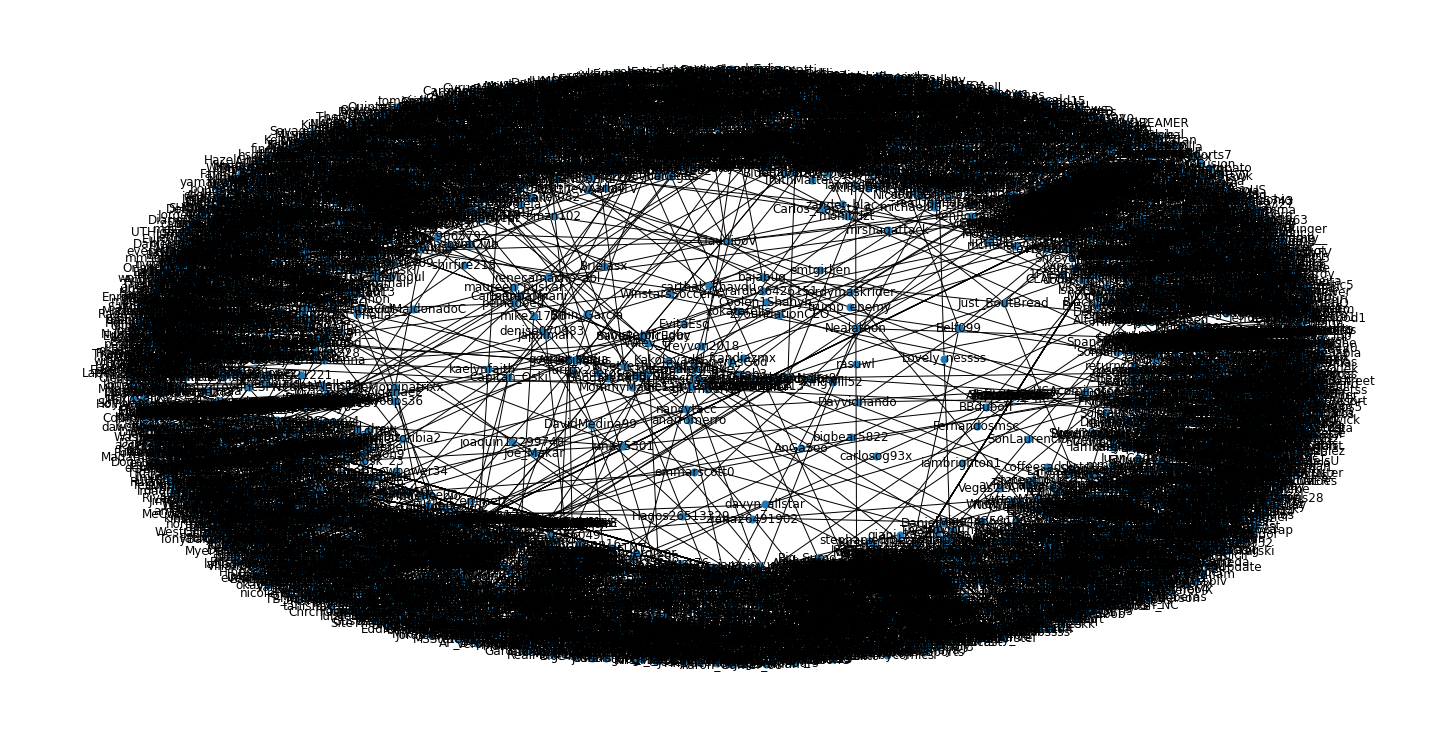

In [ ]:
plt.figure(figsize = (20, 10))

nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()  

Next, lets use the data to calculate measures of centrality - Degree, Betweenness and Closeness

In [ ]:
degree = nx.degree_centrality(g)
between = nx.betweenness_centrality(g)
close = nx.closeness_centrality(g)

In [ ]:
df = pd.DataFrame([degree, between,close]).T

In [ ]:
df.reset_index(inplace = True)
df.columns = ['Username','degree','between','close']
df.head()

,Username,degree,between,close
0,WolfieWankstaiN,0.000175,0.0,0.000000
1,TheDemCoalition,0.003667,0.0,0.003667
2,manuxrazo,0.000349,0.0,0.000000
3,DoreenJoseph_,0.000175,0.0,0.000000
4,ticketstocolson,0.000175,0.0,0.000175


In [ ]:
data.merge(df,how = 'inner',left_on='Username',right_on = 'Username').head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers,degree,between,close
0,0,RT @TheDemCoalition: Us looking for 17 U.S. Se...,0,594,2021-02-08 04:16:17,WolfieWankstaiN,57868,"Cantankerous , Socialist, Radical Left, Snowfl...",604,399,0.000175,0.0,0.0
1,1,"#BudLightFunFans #SuperBowlÂ Â Â Â Â ""Daft Pu...",0,0,2021-02-08 04:16:17,manuxrazo,8,NaN,34,35,0.000349,0.0,0.0
2,2,RT @ticketstocolson: Friendly reminder on this...,0,22,2021-02-08 04:16:17,DoreenJoseph_,68713,21 |XX| in a relationship with my anxiety:(,231,367,0.000175,0.0,0.0
3,3,RT @TylerJRoney: 4 year old me in the grocery ...,0,1699,2021-02-08 04:16:17,_Jpap__,29853,#RiseUp,417,389,0.000349,0.0,0.0
4,131,RT @DJ112sa: Me trying to find the bathroom at...,0,2165,2021-02-08 04:16:11,_Jpap__,29854,#RiseUp,417,389,0.000349,0.0,0.0


In [ ]:
import pandas as pd
sma_ass_1 = pd.read_csv('SMA_Assignment_1.csv')

sma_ass_1 = sma_ass_1.iloc[:, 1:] # removes the first useless column

In [ ]:
# get retweet_sent counts, tweet counts and retweets_received counts

user_a_retweets_tweets = pd.pivot_table(sma_ass_1, index = 'User_A', columns = 'Interaction', aggfunc = "count", fill_value = 0).reset_index()
user_a_retweets_tweets.columns = user_a_retweets_tweets.columns.get_level_values(0)
user_a_retweets_tweets.columns = ['User_Name', 'Retweets_sent','tweet_count']

In [ ]:
user_b_retweets_rec = pd.pivot_table(sma_ass_1, index = 'User_B', columns = 'Interaction', aggfunc = "count", fill_value = 0).reset_index()

user_b_retweets_rec.columns = user_b_retweets_rec.columns.get_level_values(0)
user_b_retweets_rec.columns = ['User_Name', 'Retweets_rec','tweet_count']

In [ ]:
user_b_retweets_rec.drop('tweet_count', inplace = True, axis = 1)

In [ ]:
# merge the two for the final results
data2 = user_a_retweets_tweets.merge(user_b_retweets_rec, how = 'outer', left_on = 'User_Name', right_on = 'User_Name').fillna(0)

In [ ]:
# merge with other user data
final_df = data[['Username', 'Following', 'Followers']].drop_duplicates().merge(data2, how = 'left', left_on = 'Username', right_on = 'User_Name')
final_df.drop('User_Name', axis = 1, inplace = True)

In [ ]:
final_df.head()

,Username,Following,Followers,Retweets_sent,tweet_count,Retweets_rec
0,WolfieWankstaiN,604,399,1.0,0.0,0.0
1,manuxrazo,34,35,0.0,1.0,0.0
2,DoreenJoseph_,231,367,1.0,0.0,0.0
3,_Jpap__,417,389,2.0,0.0,0.0
4,edinadarling,4980,1498,1.0,0.0,0.0


Normalizing the variables -

In [ ]:
for i in final_df.iloc[:, 1:]:
    mean = final_df[i].mean()
    std = final_df[i].std()
    
    final_df[i] -= mean
    final_df[i] /= std

In [ ]:
final_df.drop_duplicates(inplace=True)

In [ ]:
# merge network stats with twitter stats
final_df2 = df.merge(final_df, on = "Username")

In [ ]:
final_df

,Username,Following,Followers,Retweets_sent,tweet_count,Retweets_rec
0,WolfieWankstaiN,-0.121495,-0.041371,-0.004810,-0.291883,-0.052668
1,manuxrazo,-0.236701,-0.043162,-1.528463,1.880096,-0.052668
2,DoreenJoseph_,-0.196884,-0.041528,-0.004810,-0.291883,-0.052668
3,_Jpap__,-0.159291,-0.041420,1.518844,-0.291883,-0.052668
4,edinadarling,0.762959,-0.035961,-0.004810,-0.291883,-0.052668
...,...,...,...,...,...,...
4430,PolisanoJ,1.179922,-0.007867,-0.004810,-0.291883,-0.052668
4431,crandsberry,0.072333,-0.041415,-0.004810,-0.291883,-0.052668
4432,Rick6508759044,-0.191831,-0.042207,-0.004810,-0.291883,-0.052668
4433,tiredgalgn,-0.228010,-0.043290,-0.004810,-0.291883,-0.052668


In [ ]:
var_coefficients

follower_div            0.002000
network1_div            0.000047
network2_div            0.003200
posts_div               0.005400
retweetssent_div        0.012600
retweetsreceived_div   -0.000015
dtype: float64

In [ ]:
final_df2['Score'] = final_df2['Followers']*var_coefficients[0] + final_df2['Retweets_rec']*var_coefficients[5] + \
final_df2['degree']*var_coefficients[1] + final_df2['between']*var_coefficients[2] + \
final_df2['Retweets_sent']*var_coefficients[4] + final_df2['tweet_count']*var_coefficients[3]

In [ ]:
# These are the Top 25 influencers using a score calculated by multiplying the logistic regression coefficients to the
# appropriate twitter stats.

final_df2.drop_duplicates(subset='Username',inplace=True)
final_df2.sort_values(by='Score', ascending=False)[:25]

,Username,degree,between,close,Following,Followers,Retweets_sent,tweet_count,Retweets_rec,Score
40,RonVenturo,0.000524,0.0,0.000175,-0.118868,-0.042020,18.279031,-0.291883,23.429165,0.228300
649,ClaudiooV,0.001397,0.0,0.000000,0.102448,-0.041833,16.755378,-0.291883,-0.052668,0.209459
1505,EstrelaDANoite8,0.001397,0.0,0.000000,0.767203,-0.029404,12.184417,-0.291883,-0.052668,0.151890
2032,gooner_sania,0.001222,0.0,0.000000,0.766799,-0.039160,12.184417,-0.291883,-0.052668,0.151870
2697,ahmedaamir185,0.000175,0.0,0.000000,0.767203,-0.040101,10.660764,-0.291883,-0.052668,0.132670
30,sabasabina5,0.000524,0.0,0.000175,-0.195267,-0.042424,-1.528463,27.943842,1.183218,0.131535
61,pjikkyu,0.000349,0.0,0.000000,-0.144132,-0.042060,-1.528463,25.771863,-0.052668,0.119826
907,renecamacho_abl,0.001222,0.0,0.000000,-0.238116,0.072086,9.137111,-0.291883,-0.052668,0.113696
681,nancytacc,0.001222,0.0,0.000000,0.054344,-0.037108,9.137111,-0.291883,-0.052668,0.113478
139,HuffPost,0.000699,0.0,0.000349,0.892515,56.378529,-1.528463,1.880096,2.419104,0.103614
